In [1]:
%cd "../.."

/home/ensai/projet-statistique-2022


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import hdbscan as HD

import seaborn as sns

from word_embedding.distance_wmd import *
from reduction_dim.correlation_matrix import *
import clustering.fit_clustering as CL 

import warnings
# warnings.filterwarnings("ignore", category=RuntimeWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

# skipgram

In [3]:
#Read WMD matrix
mat_skipgram_wmd = np.array(lecture_fichier_distances_wmd("distances_skipgram.7z"))
#Read MDS embedding
mat_skipgram_mds = np.array(pd.read_csv("data/tuning/MDS/skipgram_mds_embedding.csv",sep=";",header=0))

print(f"mat_skipgram_wmd shape {mat_skipgram_wmd.shape}")
print(f"mat_skipgram_mds shape {mat_skipgram_mds.shape}")

mat_skipgram_wmd shape (9501, 9501)
mat_skipgram_mds shape (9501, 50)


In [4]:
mat_skipgram_mds_eculidean = euclidean_distances(mat_skipgram_mds)
np.fill_diagonal(mat_skipgram_mds_eculidean,0)

Correlation Pearson wmd Euclidien et WMD:  0.9938619812233896
Correlation Spearman MDS Euclidien et WMD:  0.989216597659674


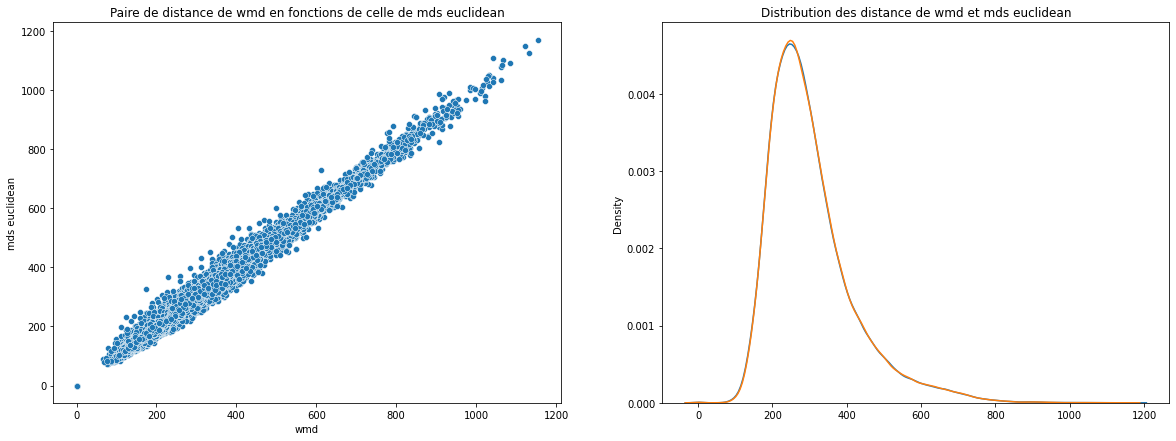

In [5]:
print("Correlation Pearson wmd Euclidien et WMD: ",correlation_epsilon(mat_skipgram_wmd,mat_skipgram_mds_eculidean,epsilon=np.inf))
print("Correlation Spearman MDS Euclidien et WMD: ",correlation_epsilon(mat_skipgram_wmd,mat_skipgram_mds_eculidean,epsilon=np.inf,type="spearman"))
flat_skipgram_wmd,flat_mds_eculidean  = flat_matrix(mat_skipgram_wmd),flat_matrix(mat_skipgram_mds_eculidean)

sample_size = 10**5
sample_index = random.sample(range(len(flat_skipgram_wmd)),sample_size)

plt.figure(figsize = (20,7))
sns.scatterplot(x=flat_skipgram_wmd[sample_index],y=flat_mds_eculidean[sample_index], ax=plt.subplot(1,2,1,title="Paire de distance de wmd en fonctions de celle de mds euclidean"))
plt.xlabel("wmd")
plt.ylabel("mds euclidean")
sns.kdeplot(flat_mds_eculidean[sample_index], ax=plt.subplot(1,2,2,title="Distribution des distance de wmd et mds euclidean"))
sns.kdeplot(flat_skipgram_wmd[sample_index], ax=plt.subplot(1,2,2,title="Distribution des distance de wmd et mds euclidean"))
plt.show()

# Comparaison HDBSCAN

# Avec TSNE

In [6]:
list_perplexity = [50,75,100,125,150,200]

In [7]:
list_result_mds = []
list_result_wmd = []
for perplexity in list_perplexity:
    tsne = TSNE(n_components = 2, perplexity=perplexity, n_iter=2000, random_state=0)
    tsne_mds = tsne.fit_transform(mat_skipgram_mds)
    tsne = TSNE(n_components = 2, perplexity=perplexity, n_iter=2000, random_state=0,metric="precomputed")
    tsne_wmd = tsne.fit_transform(mat_skipgram_wmd)

    df_result_mds,_ = CL.selection_meilleur_hdbscan(data=tsne_mds,listeDistances="euclidean",listeMinClusterSize=range(10,15),listeVoisinage=range(2,31,2),init_dim=mat_skipgram_mds.shape[1])
    df_result_wmd,_ = CL.selection_meilleur_hdbscan(data=tsne_wmd,listeDistances="euclidean",listeMinClusterSize=range(10,15),listeVoisinage=range(2,31,2),init_dim=mat_skipgram_mds.shape[1])
    
    df_result_mds["perplexity"] = perplexity
    df_result_wmd["perplexity"] = perplexity
    
    list_result_mds += [df_result_mds]
    list_result_wmd += [df_result_wmd]


/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), a

Recherche optimale - HDBScan
0% 2% 6% 11% 16% 22% 26% 31% 36% 42% 46% 51% 56% 62% 66% 71% 76% 82% 86% 91% 96% 
 
Recherche optimale - HDBScan
0% 2% 6% 11% 16% 22% 26% 31% 36% 42% 46% 51% 56% 62% 66% 71% 76% 82% 86% 91% 96% 
 


/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), a

Recherche optimale - HDBScan
0% 2% 6% 11% 16% 22% 26% 31% 36% 42% 46% 51% 56% 62% 66% 71% 76% 82% 86% 91% 96% 
 
Recherche optimale - HDBScan
0% 2% 6% 11% 16% 22% 26% 31% 36% 42% 46% 51% 56% 62% 66% 71% 76% 82% 86% 91% 96% 
 


/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), a

Recherche optimale - HDBScan
0% 2% 6% 11% 16% 22% 26% 31% 36% 42% 46% 51% 56% 62% 66% 71% 76% 82% 86% 91% 96% 
 
Recherche optimale - HDBScan
0% 2% 6% 11% 16% 22% 26% 31% 36% 42% 46% 51% 56% 62% 66% 71% 76% 82% 86% 91% 96% 
 


/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), a

Recherche optimale - HDBScan
0% 2% 6% 11% 16% 22% 26% 31% 36% 42% 46% 51% 56% 62% 66% 71% 76% 82% 86% 91% 96% 
 
Recherche optimale - HDBScan
0% 2% 6% 11% 16% 22% 26% 31% 36% 42% 46% 51% 56% 62% 66% 

In [ ]:
all_tsne_mds = pd.concat(list_result_mds).reset_index().sort_values(by = 'DBCV', ascending = False, inplace = False)
all_tsne_wmd = pd.concat(list_result_wmd).reset_index().sort_values(by = 'DBCV', ascending = False, inplace = False)

all_tsne_wmd["type"] = "WMD"
all_tsne_mds["type"] = "MDS"

### Metric Distribution

<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='Density'>

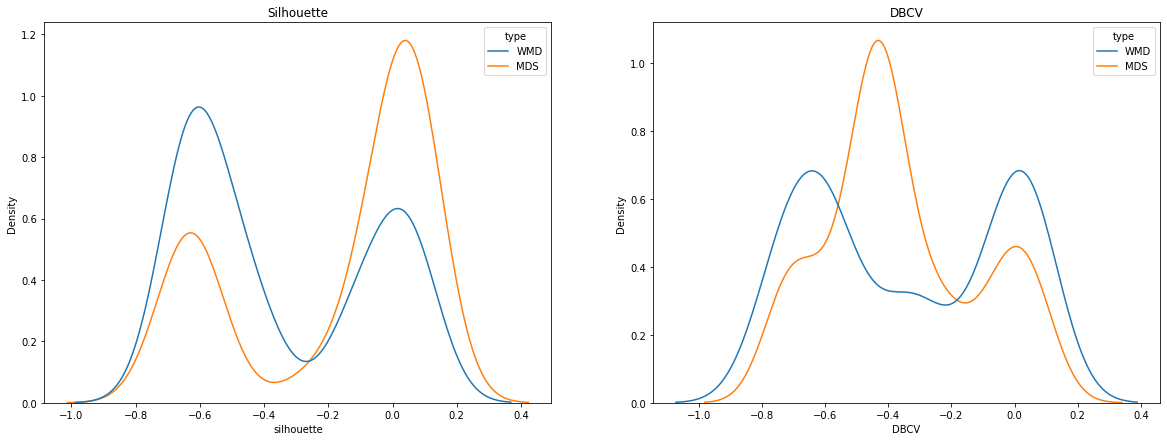

In [ ]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([all_tsne_wmd,all_tsne_mds]).reset_index(),x="silhouette",hue="type",ax=plt.subplot(1,2,1,title="Silhouette"))
sns.kdeplot(data=pd.concat([all_tsne_wmd,all_tsne_mds]).reset_index(),x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Non classe Distribution

<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='non_classes'>

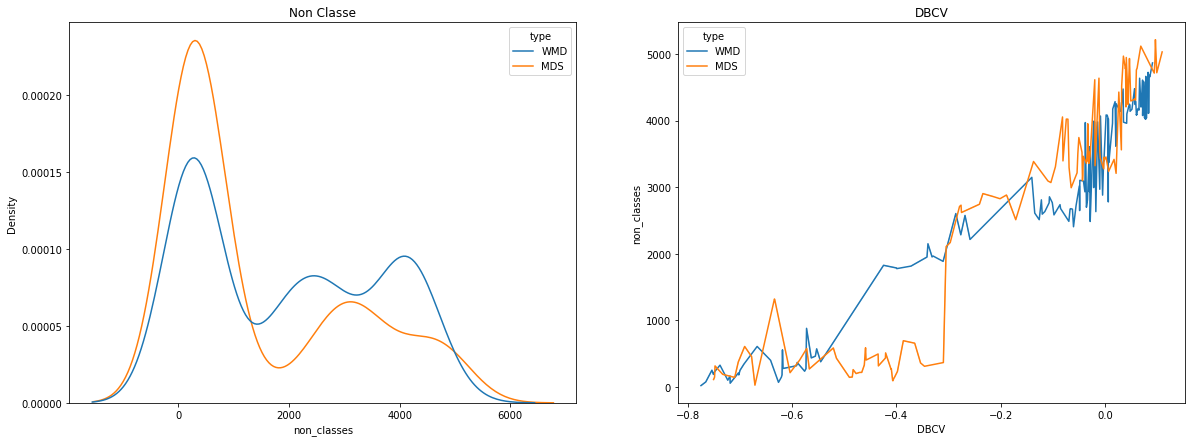

In [ ]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([all_tsne_wmd,all_tsne_mds]).reset_index(),x="non_classes",hue="type",ax=plt.subplot(1,2,1,title="Non Classe"))
sns.lineplot(data=pd.concat([all_tsne_wmd,all_tsne_mds]).reset_index(),y="non_classes",x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Metric distribution in function of other parameters

<AxesSubplot:title={'center':'DBCV'}, xlabel='min_cluster_size', ylabel='silhouette'>

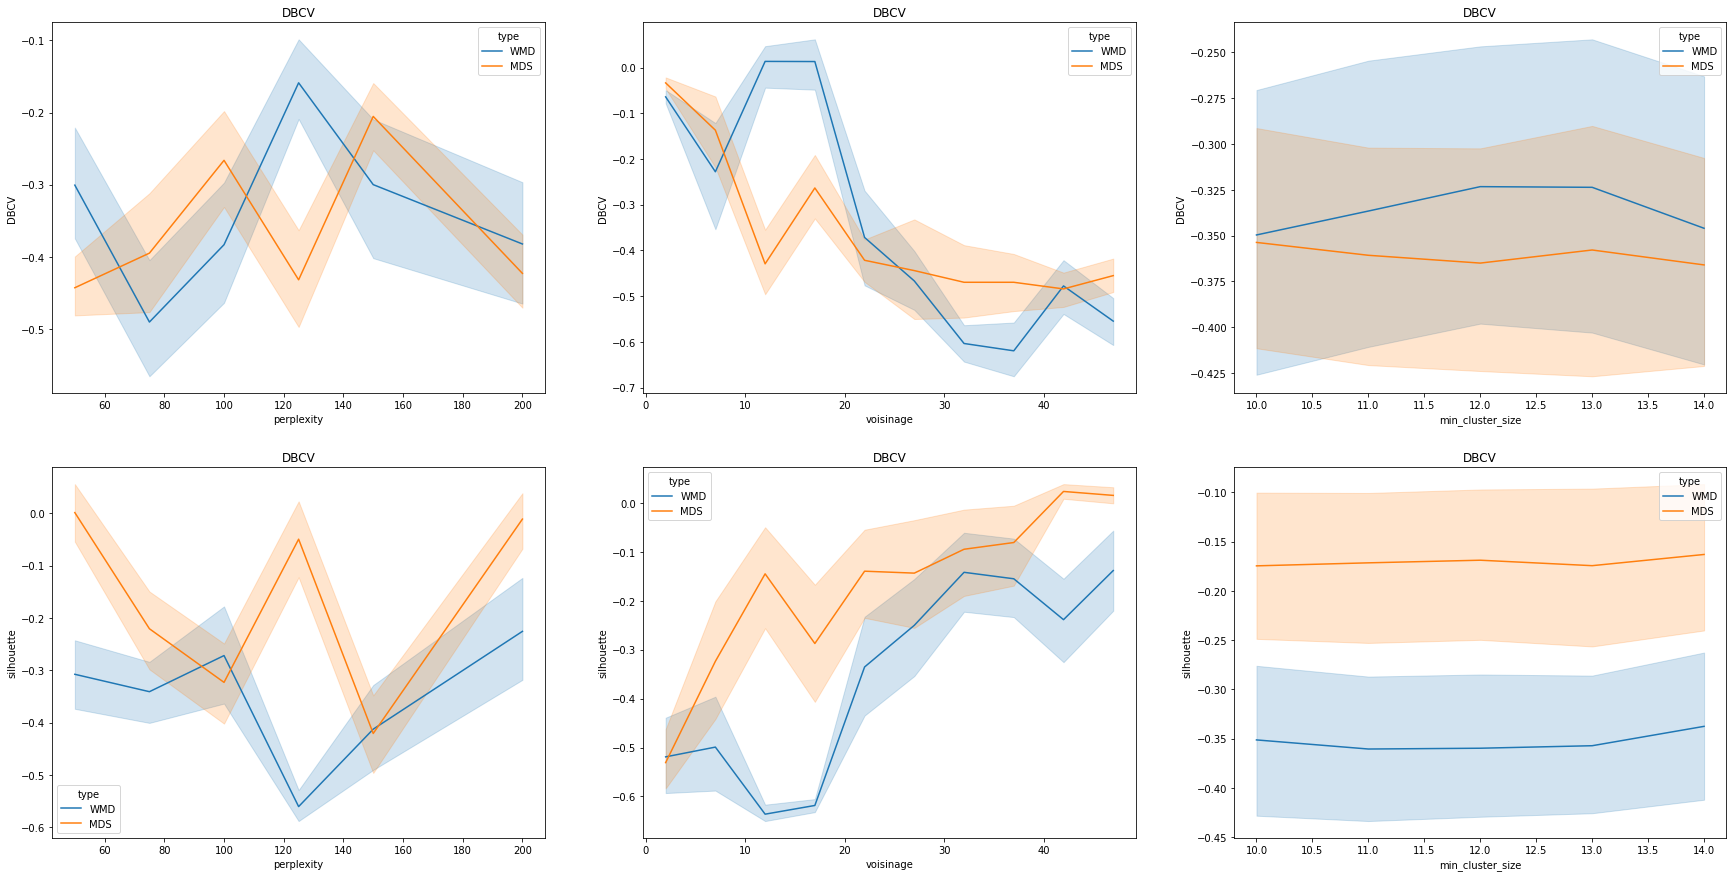

In [ ]:
plt.figure(figsize = (30,15))

sns.lineplot(data=pd.concat([all_tsne_wmd,all_tsne_mds]).reset_index(),y="DBCV",x="perplexity",hue="type",ax=plt.subplot(2,3,1,title="DBCV"))
sns.lineplot(data=pd.concat([all_tsne_wmd,all_tsne_mds]).reset_index(),y="DBCV",x="voisinage",hue="type",ax=plt.subplot(2,3,2,title="DBCV"))
sns.lineplot(data=pd.concat([all_tsne_wmd,all_tsne_mds]).reset_index(),y="DBCV",x="min_cluster_size",hue="type",ax=plt.subplot(2,3,3,title="DBCV"))

sns.lineplot(data=pd.concat([all_tsne_wmd,all_tsne_mds]).reset_index(),y="silhouette",x="perplexity",hue="type",ax=plt.subplot(2,3,4,title="DBCV"))
sns.lineplot(data=pd.concat([all_tsne_wmd,all_tsne_mds]).reset_index(),y="silhouette",x="voisinage",hue="type",ax=plt.subplot(2,3,5,title="DBCV"))
sns.lineplot(data=pd.concat([all_tsne_wmd,all_tsne_mds]).reset_index(),y="silhouette",x="min_cluster_size",hue="type",ax=plt.subplot(2,3,6,title="DBCV"))

### Best models 
#### Include All model

In [ ]:
#MDS
best_tsne_mds = all_tsne_mds.iloc[np.argmax(all_tsne_mds["DBCV"])]
tsne = TSNE(n_components = 2, perplexity=best_tsne_mds["perplexity"], n_iter=2000, random_state=0)
tsne_mds = tsne.fit_transform(mat_skipgram_mds)

model_skipgram = HD.HDBSCAN(min_cluster_size=int(best_tsne_mds["min_cluster_size"]), metric = "euclidean",min_samples=int(best_tsne_mds["voisinage"]))
best_labels_mds = model_skipgram.fit_predict(np.array(tsne_mds).astype(np.float64))

print("Best Tsne MDS")
pd.DataFrame(best_tsne_mds).transpose()

/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Best Tsne MDS


,index,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,perplexity,type
100,25,27,10,euclidean,32,-0.569113,370.806365,0.110013,5032,100,MDS


In [ ]:
#WMD
best_tsne_wmd = all_tsne_wmd.iloc[np.argmax(all_tsne_wmd["DBCV"])]
tsne = TSNE(n_components = 2, perplexity=best_tsne_wmd["perplexity"], n_iter=2000, random_state=0,metric="precomputed")
tsne_wmd = tsne.fit_transform(mat_skipgram_wmd)

model_wmd = HD.HDBSCAN(min_cluster_size=int(best_tsne_wmd["min_cluster_size"]), metric = "euclidean",min_samples=int(best_tsne_wmd["voisinage"]))
best_labels_wmd = model_wmd.fit_predict(np.array(tsne_wmd).astype(np.float64))

print("Best Tsne WMD")
pd.DataFrame(best_tsne_wmd).transpose()

/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


Best Tsne WMD


,index,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,perplexity,type
250,19,17,14,euclidean,46,-0.670044,262.90947,0.09152,4867,200,WMD


<Figure size 2160x720 with 0 Axes>

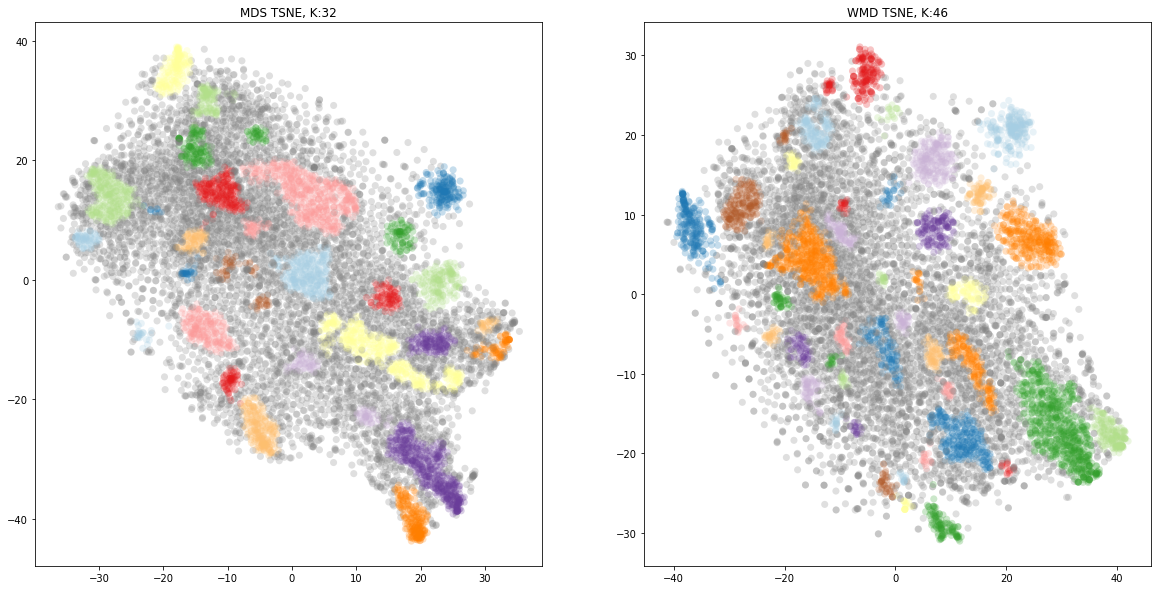

In [ ]:
plt.figure(figsize = (30,10))

# MDS
plt.figure(figsize = (20,10))
color_palette = sns.color_palette('Paired', len(np.unique(best_labels_mds)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in best_labels_mds]
plt.subplot(1,2,1,title=f"MDS TSNE, K:{len(np.unique(best_labels_mds))}").scatter(tsne_mds[:,0],tsne_mds[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.25)

# Wmd
color_palette = sns.color_palette('Paired', len(np.unique(best_labels_wmd)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in best_labels_wmd]
plt.subplot(1,2,2,title=f"WMD TSNE, K:{len(np.unique(best_labels_wmd))}").scatter(tsne_wmd[:,0],tsne_wmd[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.25)

#### Only K <= max_K

In [ ]:
max_K = 20

In [ ]:
#MDS
filtred_tsne_mds = all_tsne_mds.loc[all_tsne_mds["K"]<=max_K,]
best_tsne_mds = filtred_tsne_mds.iloc[np.argmax(filtred_tsne_mds["DBCV"])]
tsne = TSNE(n_components = 2, perplexity=best_tsne_mds["perplexity"], n_iter=2000, random_state=0)
tsne_mds = tsne.fit_transform(mat_skipgram_mds)

model_skipgram = HD.HDBSCAN(min_cluster_size=int(best_tsne_mds["min_cluster_size"]), metric = "euclidean",min_samples=int(best_tsne_mds["voisinage"]))
best_labels_mds = model_skipgram.fit_predict(np.array(tsne_mds).astype(np.float64))

print(f"Best Tsne MDS with K <= {max_K}")
pd.DataFrame(best_tsne_mds).transpose()

/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Best Tsne MDS with K <= 20


,index,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,perplexity,type
219,30,32,10,euclidean,12,-0.634963,383.449737,-0.170983,2512,150,MDS


In [ ]:
#WMD
filtred_tsne_wmd = all_tsne_wmd.loc[all_tsne_wmd["K"]<=max_K,]
best_tsne_wmd = filtred_tsne_wmd.iloc[np.argmax(filtred_tsne_wmd["DBCV"])]
tsne = TSNE(n_components = 2, perplexity=best_tsne_wmd["perplexity"], n_iter=2000, random_state=0,metric="precomputed")
tsne_wmd = tsne.fit_transform(mat_skipgram_wmd)

model_wmd = HD.HDBSCAN(min_cluster_size=int(best_tsne_wmd["min_cluster_size"]), metric = "euclidean",min_samples=int(best_tsne_wmd["voisinage"]))
best_labels_wmd = model_wmd.fit_predict(np.array(tsne_wmd).astype(np.float64))

print(f"Best Tsne WMD with K <= {max_K}")
pd.DataFrame(best_tsne_wmd).transpose()

/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ensai/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


Best Tsne WMD with K <= 20


,index,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,perplexity,type
178,29,27,14,euclidean,15,-0.513025,572.655396,-0.258729,2215,125,WMD


<Figure size 2160x720 with 0 Axes>

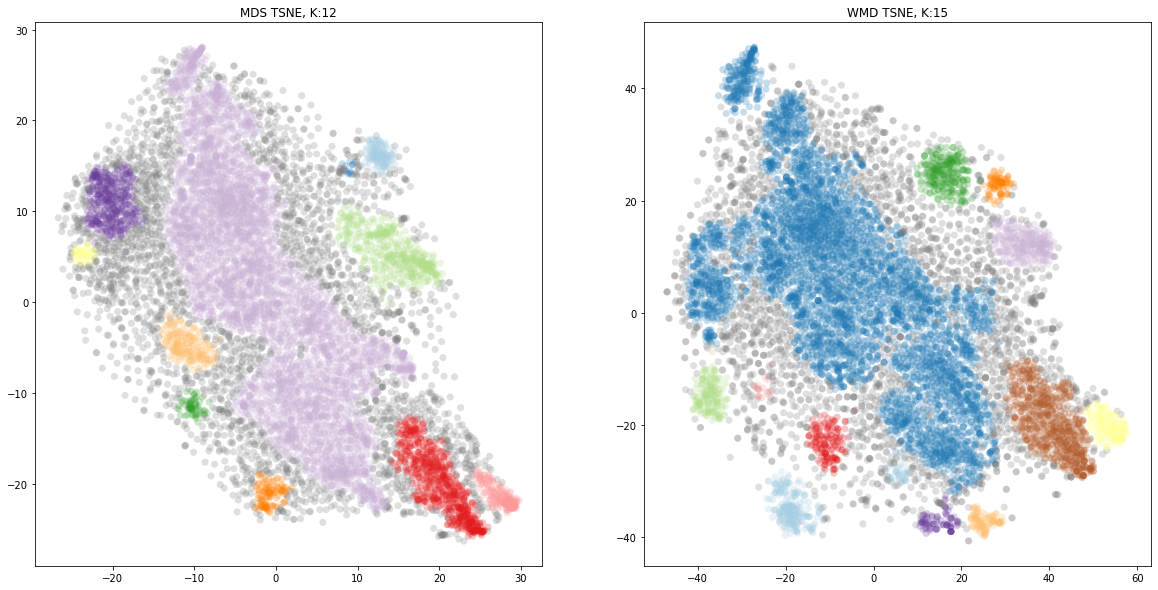

In [ ]:
plt.figure(figsize = (30,10))

# MDS
plt.figure(figsize = (20,10))
color_palette = sns.color_palette('Paired', len(np.unique(best_labels_mds)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in best_labels_mds]
plt.subplot(1,2,1,title=f"MDS TSNE, K:{len(np.unique(best_labels_mds))}").scatter(tsne_mds[:,0],tsne_mds[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.25)

# Wmd
color_palette = sns.color_palette('Paired', len(np.unique(best_labels_wmd)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in best_labels_wmd]
plt.subplot(1,2,2,title=f"WMD TSNE, K:{len(np.unique(best_labels_wmd))}").scatter(tsne_wmd[:,0],tsne_wmd[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.25)

## Sans TSNE

In [ ]:
df_hdbscan_skipgram_mds_euclidean, all_skipgram_mds_labels = CL.selection_meilleur_hdbscan(data=mat_skipgram_mds_eculidean,listeDistances="precomputed",listeMinClusterSize=range(10,15),listeVoisinage=range(2,50,5),init_dim=mat_skipgram_mds.shape[1])
df_hdbscan_skipgram_wmd,all_skipgram_wmd_labels = CL.selection_meilleur_hdbscan(data=mat_skipgram_wmd,listeDistances="precomputed",listeMinClusterSize=range(10,15),listeVoisinage=range(2,50,5),init_dim=mat_skipgram_mds.shape[1])

Recherche optimale - HDBScan
0% 2% 6% 12% 16% 22% 26% 32% 36% 42% 46% 52% 56% 62% 66% 72% 76% 82% 86% 92% 96% 
 
Recherche optimale - HDBScan
0% 2% 6% 12% 16% 22% 26% 32% 36% 42% 46% 52% 56% 62% 66% 72% 76% 82% 86% 92% 96% 
 


In [ ]:
df_hdbscan_skipgram_wmd["type"] = "WMD"
df_hdbscan_skipgram_mds_euclidean["type"] = "MDS"
df_hdbscan_skipgram_mds_euclidean

,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,type
25,27,10,precomputed,1,None,None,0.000000,9501,MDS
26,27,11,precomputed,1,None,None,0.000000,9501,MDS
28,27,13,precomputed,1,None,None,0.000000,9501,MDS
29,27,14,precomputed,1,None,None,0.000000,9501,MDS
30,32,10,precomputed,1,None,None,0.000000,9501,MDS
31,32,11,precomputed,1,None,None,0.000000,9501,MDS
32,32,12,precomputed,1,None,None,0.000000,9501,MDS
33,32,13,precomputed,1,None,None,0.000000,9501,MDS
34,32,14,precomputed,1,None,None,0.000000,9501,MDS
35,37,10,precomputed,1,None,None,0.000000,9501,MDS


### Metric Distribution

<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='Density'>

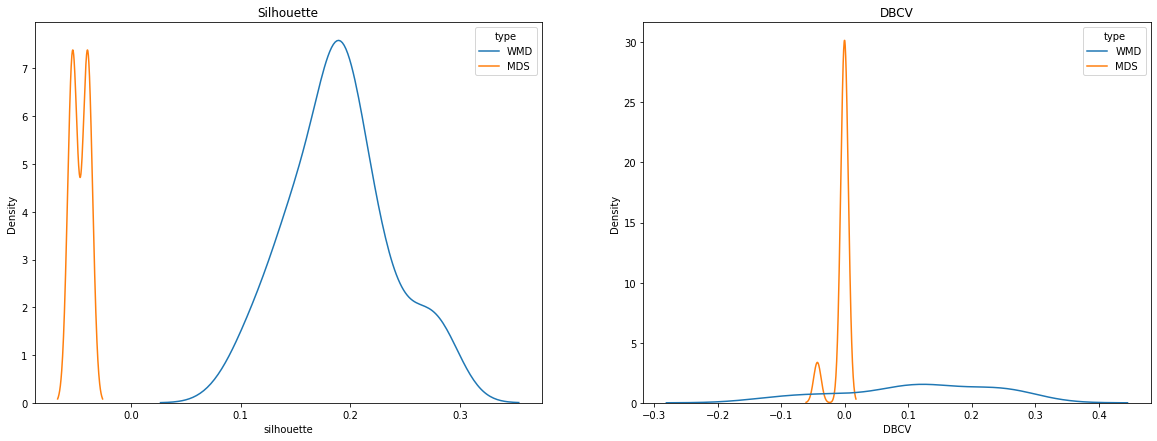

In [ ]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean]).dropna(subset="silhouette").reset_index(),x="silhouette",hue="type",ax=plt.subplot(1,2,1,title="Silhouette"))
sns.kdeplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean]).dropna(subset="DBCV").reset_index(),x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Non classe distribution

<AxesSubplot:title={'center':'DBCV'}, xlabel='DBCV', ylabel='non_classes'>

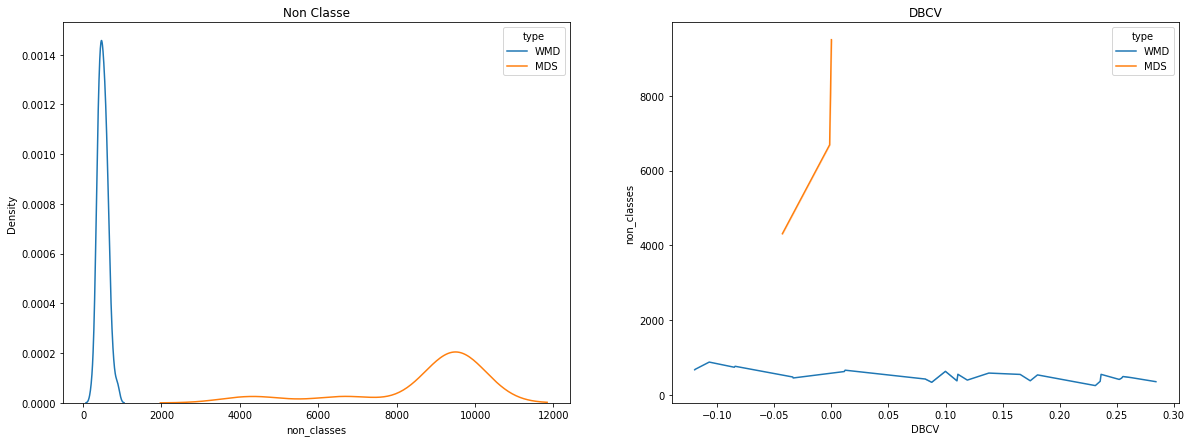

In [ ]:
plt.figure(figsize = (20,7))
sns.kdeplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean]).reset_index(),x="non_classes",hue="type",ax=plt.subplot(1,2,1,title="Non Classe"))
sns.lineplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean]).reset_index(),y="non_classes",x="DBCV",hue="type",ax=plt.subplot(1,2,2,title="DBCV"))

### Metric distribution in function of other parameters

<AxesSubplot:title={'center':'DBCV'}, xlabel='min_cluster_size', ylabel='silhouette'>

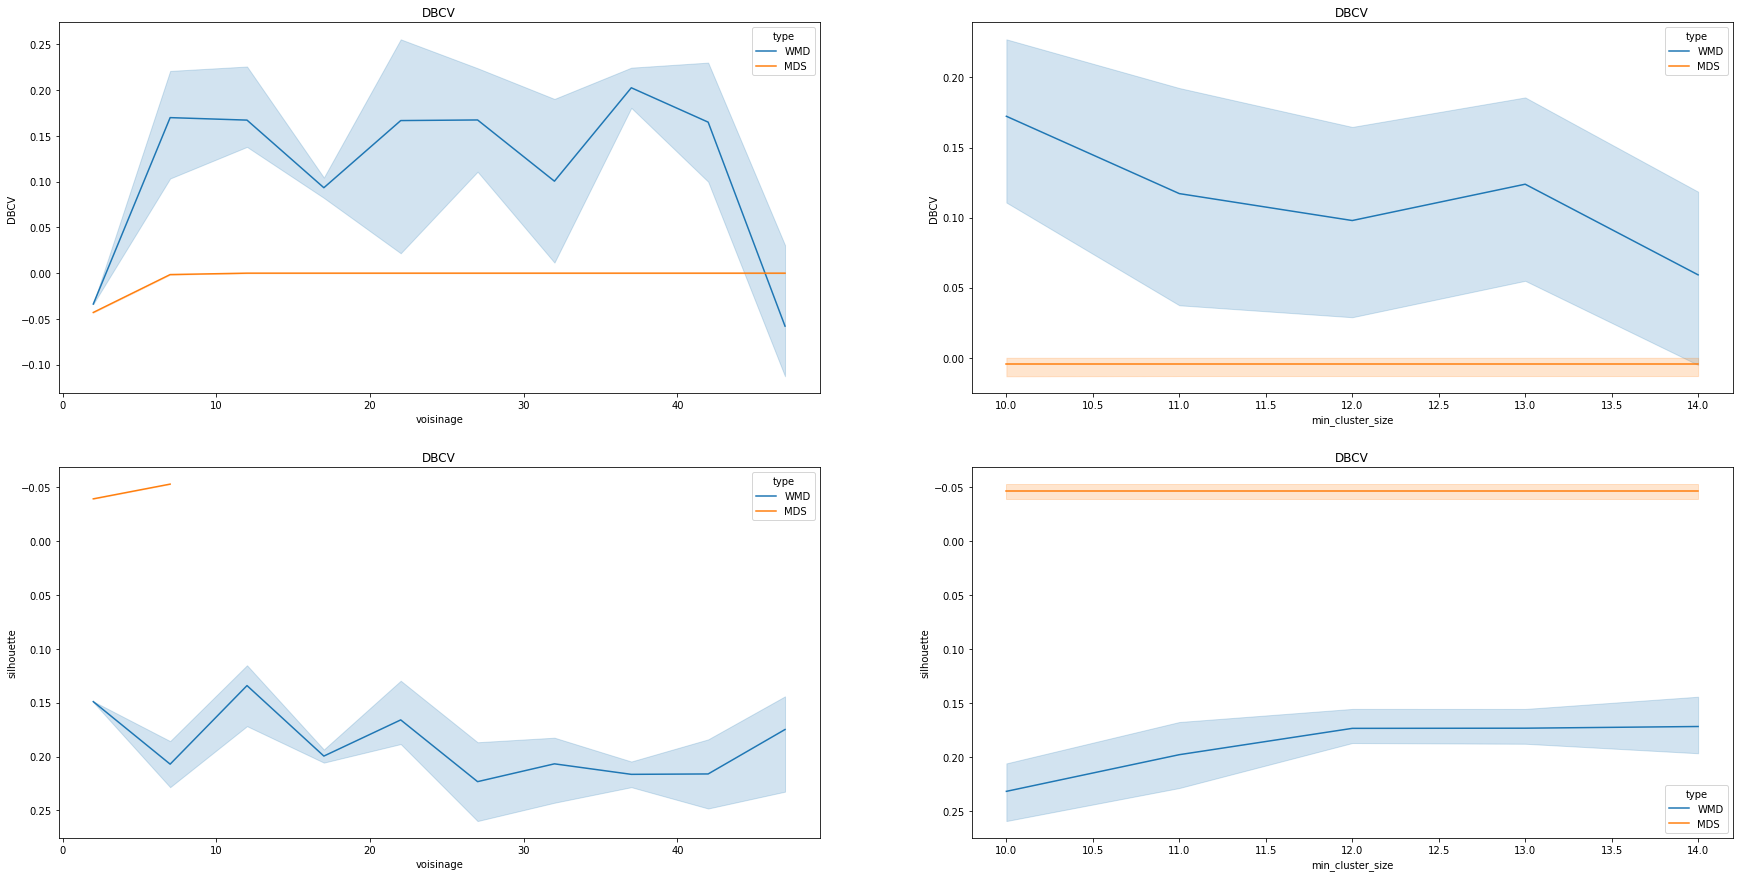

In [ ]:
plt.figure(figsize = (30,15))

sns.lineplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean]).reset_index(),y="DBCV",x="voisinage",hue="type",ax=plt.subplot(2,2,1,title="DBCV"))
sns.lineplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean]).reset_index(),y="DBCV",x="min_cluster_size",hue="type",ax=plt.subplot(2,2,2,title="DBCV"))

sns.lineplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean]).reset_index(),y="silhouette",x="voisinage",hue="type",ax=plt.subplot(2,2,3,title="DBCV"))
sns.lineplot(data=pd.concat([df_hdbscan_skipgram_wmd,df_hdbscan_skipgram_mds_euclidean]).reset_index(),y="silhouette",x="min_cluster_size",hue="type",ax=plt.subplot(2,2,4,title="DBCV"))

### Best models 

In [ ]:
#MDS
best_mds = df_hdbscan_skipgram_mds_euclidean.iloc[np.argmax(df_hdbscan_skipgram_mds_euclidean["DBCV"])]

model_skipgram = HD.HDBSCAN(min_cluster_size=int(best_mds["min_cluster_size"]), metric = "precomputed",min_samples=int(best_mds["voisinage"]))
best_labels_mds = model_skipgram.fit_predict(np.array(mat_skipgram_mds_eculidean).astype(np.float64))

print("Best  MDS")
pd.DataFrame(best_mds).transpose()

Best  MDS


,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,type
25,27,10,precomputed,1,None,None,0.0,9501,MDS


In [ ]:
print(HD.validity_index(np.array(mat_skipgram_mds_eculidean).astype(np.float64),best_labels_mds,metric="precomputed",d=20))
np.unique(best_labels_mds,return_counts=True)

0


(array([-1]), array([9501]))

In [ ]:
#WMD
best_wmd = df_hdbscan_skipgram_wmd.iloc[np.argmax(df_hdbscan_skipgram_wmd["DBCV"])]

model_wmd = HD.HDBSCAN(min_cluster_size=int(best_wmd["min_cluster_size"]), metric = "precomputed",min_samples=int(best_wmd["voisinage"]))
best_labels_wmd = model_wmd.fit_predict(np.array(mat_skipgram_wmd).astype(np.float64))

print("Best WMD")
pd.DataFrame(best_wmd).transpose()

Best WMD


,voisinage,min_cluster_size,distance,K,silhouette,Cal-Harabasz,DBCV,non_classes,type
10,12,10,precomputed,4,0.209431,None,0.284271,352,WMD


In [ ]:
print(HD.validity_index(np.array(mat_skipgram_wmd).astype(np.float64),best_labels_wmd,metric="precomputed",d=20))
np.unique(best_labels_wmd,return_counts=True)

0.2049433393421909


(array([-1,  0,  1,  2]), array([ 352,   10, 9129,   10]))

<Figure size 2160x720 with 0 Axes>

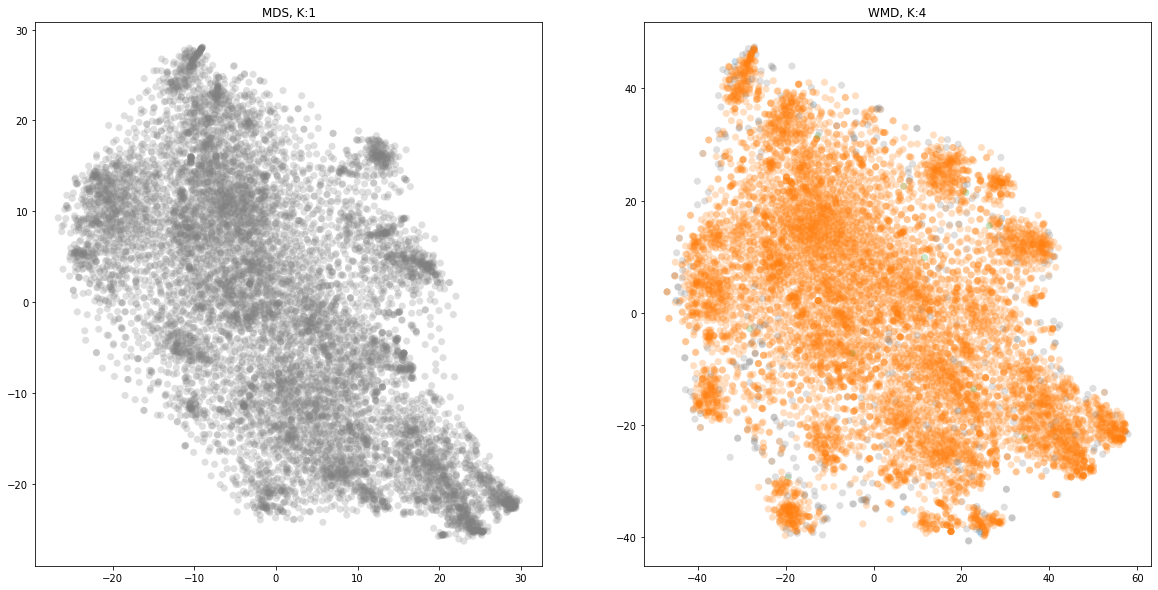

In [ ]:
plt.figure(figsize = (30,10))

# MDS
plt.figure(figsize = (20,10))
color_palette = sns.color_palette('Paired', len(np.unique(best_labels_mds)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in best_labels_mds]
plt.subplot(1,2,1,title=f"MDS, K:{len(np.unique(best_labels_mds))}").scatter(tsne_mds[:,0],tsne_mds[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.25)

# Wmd
color_palette = sns.color_palette("tab10", len(np.unique(best_labels_wmd)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in best_labels_wmd]
plt.subplot(1,2,2,title=f"WMD, K:{len(np.unique(best_labels_wmd))}").scatter(tsne_wmd[:,0],tsne_wmd[:,1], s=50, linewidth=0, c=cluster_colors, alpha=0.25)